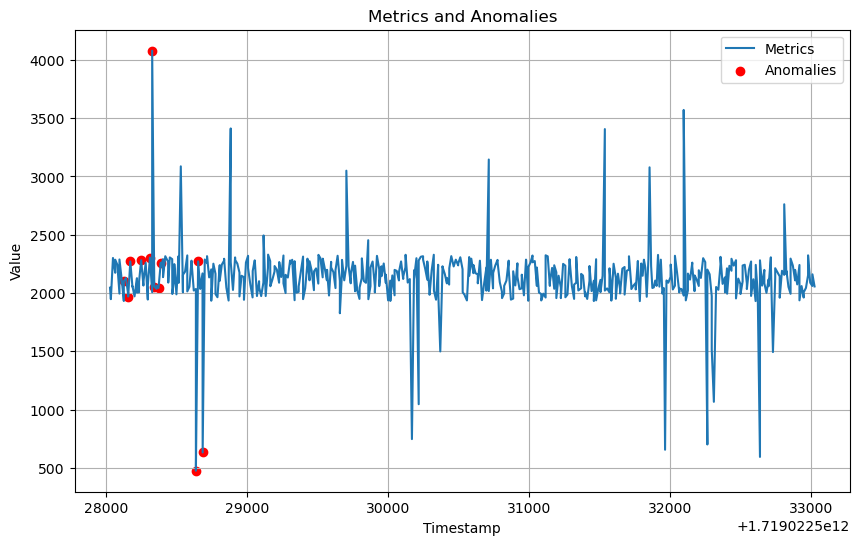

In [12]:
import re
import pandas as pd
import matplotlib.pyplot as plt

metric_pattern = re.compile(r'Produced #\d+ metric: Metric\[id=(?P<id>\w+), value=(?P<value>[\d.]+), timestamp=(?P<timestamp>\d+)\]')
anomaly_pattern = re.compile(r'Found discord metric: Metric\[id=(?P<id>\w+), value=(?P<value>[\d.]+), timestamp=(?P<timestamp>\d+)\]')

metrics = []
anomalies = []

with open('mp.log', 'r') as file:
    for line in file:
        metric_match = metric_pattern.search(line)
        anomaly_match = anomaly_pattern.search(line)
        
        if metric_match:
            metrics.append(metric_match.groupdict())
        if anomaly_match:
            anomalies.append(anomaly_match.groupdict())

metrics_df = pd.DataFrame(metrics)
anomalies_df = pd.DataFrame(anomalies)

metrics_df['value'] = metrics_df['value'].astype(float)
metrics_df['timestamp'] = metrics_df['timestamp'].astype(float)
anomalies_df['value'] = anomalies_df['value'].astype(float)
anomalies_df['timestamp'] = anomalies_df['timestamp'].astype(float)

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['timestamp'], metrics_df['value'], label='Metrics')

if not anomalies_df.empty:
    plt.scatter(anomalies_df['timestamp'], anomalies_df['value'], color='red', marker='o', label='Anomalies')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Metrics and Anomalies')
plt.legend()
plt.grid(True)

plt.show()
